In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

4431872/4422102 [==============================] - 1s 0us/step


층을 차례대로 쌓아 `tf.keras.Sequential` 모델을 만듭니다. 훈련에 사용할 옵티마이저(optimizer)와 손실 함수를 선택합니다:

In [3]:
model = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(256, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
    
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

모델을 훈련하고 평가합니다:

In [4]:
model.fit(x_train, y_train, epochs=5)

model.evaluate(x_test,  y_test, verbose=2)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5448 - accuracy: 0.8019
Epoch 2/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4114 - accuracy: 0.8501
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3810 - accuracy: 0.8605
Epoch 4/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3579 - accuracy: 0.8686
Epoch 5/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3433 - accuracy: 0.8737
313/313 - 1s - loss: 0.3607 - accuracy: 0.8687


[0.3606535792350769, 0.8687000274658203]

모델의 저장 및 불러오기

313/313 - 0s - loss: 0.3607 - accuracy: 0.8687


array([[5.0446961e-06, 9.9999142e-01, 2.1035329e-07, 2.1859757e-06,
        5.4286613e-07, 5.0921368e-12, 5.3251750e-07, 1.8820668e-12,
        1.1587015e-07, 1.0671354e-09]], dtype=float32)

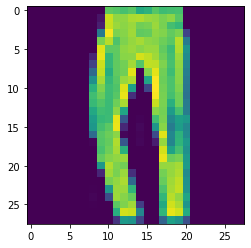

In [6]:
model_path = "beginner.h5"
model.save(model_path)

restored_model = tf.keras.models.load_model(model_path)

restored_model.evaluate(x_test,  y_test, verbose=2)

plt.imshow(x_test[5])
img = tf.reshape(x_test[5], (1, 28, 28))

restored_model.predict(img)